In [246]:
import os
import glob
import yaml

import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl

import matplotlib as mpl

import plotting as putil
import dlc as dlc
import utils as util

import importlib

In [127]:
%matplotlib notebook

In [6]:
plot_style='dark'
putil.set_sns_style(style=plot_style)
bg_color='w' if plot_style=='dark' else 'k'

In [8]:
#rootdir = '/mnt/minerva/courtship-free-behavior/maDLCv2' #maDLCv2'
rootdir = '/Users/julianarhee/DeepLabCut'
projectname = 'projector-1dot-jyr-2024-02-18'
project_dir = os.path.join(rootdir, projectname) 
# load config file
cfg_fpath = os.path.join(project_dir, 'config.yaml')
with open(cfg_fpath, "r") as f:
    cfg = yaml.load(f, Loader=yaml.SafeLoader)

In [1058]:
analyzed_dir = os.path.join(project_dir, 'analyzed')

analyzed_files = glob.glob(os.path.join(analyzed_dir, '*_el.h5'))
analyzed_files

['/Users/julianarhee/DeepLabCut/projector-1dot-jyr-2024-02-18/analyzed/20240212-1230_fly3_Dmel_sP1-ChR_3do_sh_4x4_2024-02-12-122911-0000DLC_dlcrnetms5_projector-1dotFeb18shuffle1_50000_el.h5',
 '/Users/julianarhee/DeepLabCut/projector-1dot-jyr-2024-02-18/analyzed/20240214-0945_f1_Dele-wt_5do_sh_prj10_sz6x6_2024-02-14-094517-0000DLC_dlcrnetms5_projector-1dotFeb18shuffle1_50000_el.h5',
 '/Users/julianarhee/DeepLabCut/projector-1dot-jyr-2024-02-18/analyzed/20240214-1025_f1_Dele-wt_5do_sh_prj10_sz10x10_2024-02-14-102617-0000DLC_dlcrnetms5_projector-1dotFeb18shuffle1_50000_el.h5',
 '/Users/julianarhee/DeepLabCut/projector-1dot-jyr-2024-02-18/analyzed/20240214-1002_f1_Dele-wt_5do_sh_prj10_sz8x8_2024-02-14-100259-0000DLC_dlcrnetms5_projector-1dotFeb18shuffle1_50000_el.h5',
 '/Users/julianarhee/DeepLabCut/projector-1dot-jyr-2024-02-18/analyzed/20240211-1509_f4_Dyak-splitP1a-CsChR_2do_gh_prj10_sz4x4_2024-02-11-150946-0000DLC_dlcrnetms5_projector-1dotFeb18shuffle1_50000_el.h5',
 '/Users/julianar

In [1059]:
fpath = analyzed_files[2]
trk = pd.read_hdf(fpath) #os.path.join(pathname, filename))
scorer = trk.columns.get_level_values(0)[0]
fps = 60  # Hz
max_jump = 6
tstamp = np.linspace(0, len(trk) * 1 / fps, len(trk))
nframes = len(trk)

In [1061]:
flyid = 'fly' # double check in the plots for abdomen lengths
dotid = 'single'

flypos = trk.xs(flyid, level='individuals', axis=1)
dotpos = trk.xs(dotid, level='individuals', axis=1)

In [1062]:
pcutoff=0.9
bp = 'center'

f_head = flypos.xs('head', level='bodyparts', axis=1).to_numpy()
d_ctr = dotpos.xs('center', level='bodyparts', axis=1).to_numpy()

d_ctr_filt = dlc.get_filtered_pos(dotpos, 'center', pcutoff=0.95, return_df=True)
f_head_filt = dlc.get_filtered_pos(flypos, 'head', pcutoff=0.95, return_df=True)

d_ctr_filt.shape, d_ctr_filt.dropna().shape
#d_ctr_filt[pd.isnull(d_ctr_filt).any(axis=1)] #.nonzero()[0]

((24000, 2), (23981, 2))

<IPython.core.display.Javascript object>


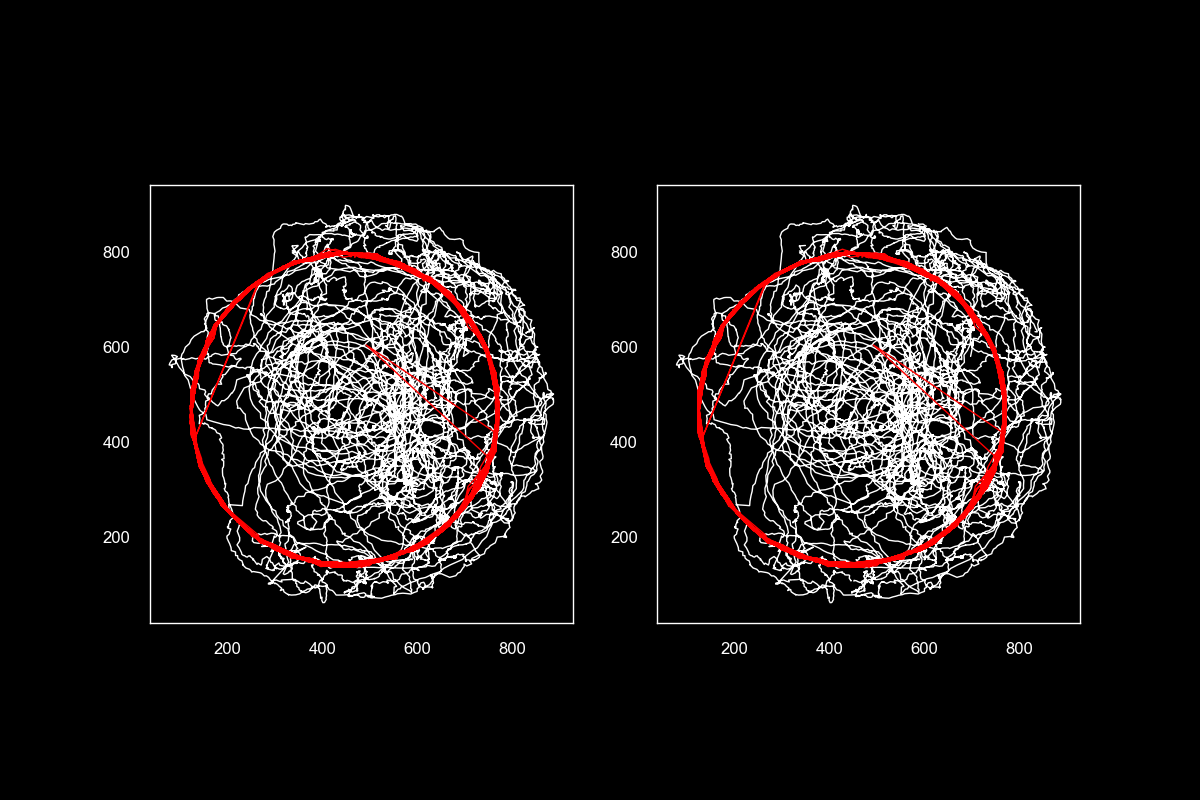

In [1063]:
fig, axn = pl.subplots(1, 2)
ax=axn[0]
ax.plot(f_head[:, 0], f_head[:, 1], c='w', lw=0.5)
ax.plot(d_ctr[:, 0], d_ctr[:, 1], c='r', lw=0.5)

ax=axn[1]
ax.plot(f_head_filt['x'] ,f_head_filt['y'], c='w', lw=0.5)
ax.plot(d_ctr_filt['x'].dropna() ,d_ctr_filt['y'].dropna() , c='r', lw=0.5)
for ax in axn:
    ax.set_aspect(1)

# Do some calcs

In [1064]:
importlib.reload(dlc)

<module 'dlc' from '/Users/julianarhee/Repositories/flytracker-analysis/dlc.py'>

In [1065]:
flypos.columns.levels[2] #get_level_values(1).unique()

Index(['likelihood', 'x', 'y'], dtype='object', name='coords')

In [1066]:
max_jump=4
flypos = dlc.remove_jumps(flypos, max_jump)
dotpos = dlc.remove_jumps(dotpos, max_jump)

In [ ]:
# def load_trk_df(fpath, flyid='fly', fps=60, max_jump=6, cop_ix=None):
    
#     trk = pd.read_hdf(fpath)
#     tstamp = np.linspace(0, len(trk) * 1 / fps, len(trk))
#     flypos = trk.xs(flyid, level='individuals', axis=1)
#     flypos = dlc.remove_jumps(flypos, max_jump)
    
#     if cop_ix is None:
#         cop_ix = len(flypos)
#     flydf = dlc.get_fly_params(flypos, cop_ix=cop_ix)
#     flydf['time'] = tstamp
    
#     return 

In [1067]:
cop_ix = len(flypos)
flydf = dlc.get_fly_params(flypos, cop_ix=cop_ix)
dotdf = dlc.get_dot_params(dotpos, cop_ix=cop_ix)
flydf, dotdf = dlc.get_interfly_params(flydf, dotdf, cop_ix=cop_ix)
# add tstamp
# flydf['time'] = tstamp
# dotdf['time'] = tstamp

/Users/julianarhee/Repositories/flytracker-analysis/dlc.py:134: RuntimeWarning: Mean of empty slice
  xCenter, yCenter = np.nanmean(aniXpos, axis=1), np.nanmean(aniYpos, axis=1)


<IPython.core.display.Javascript object>


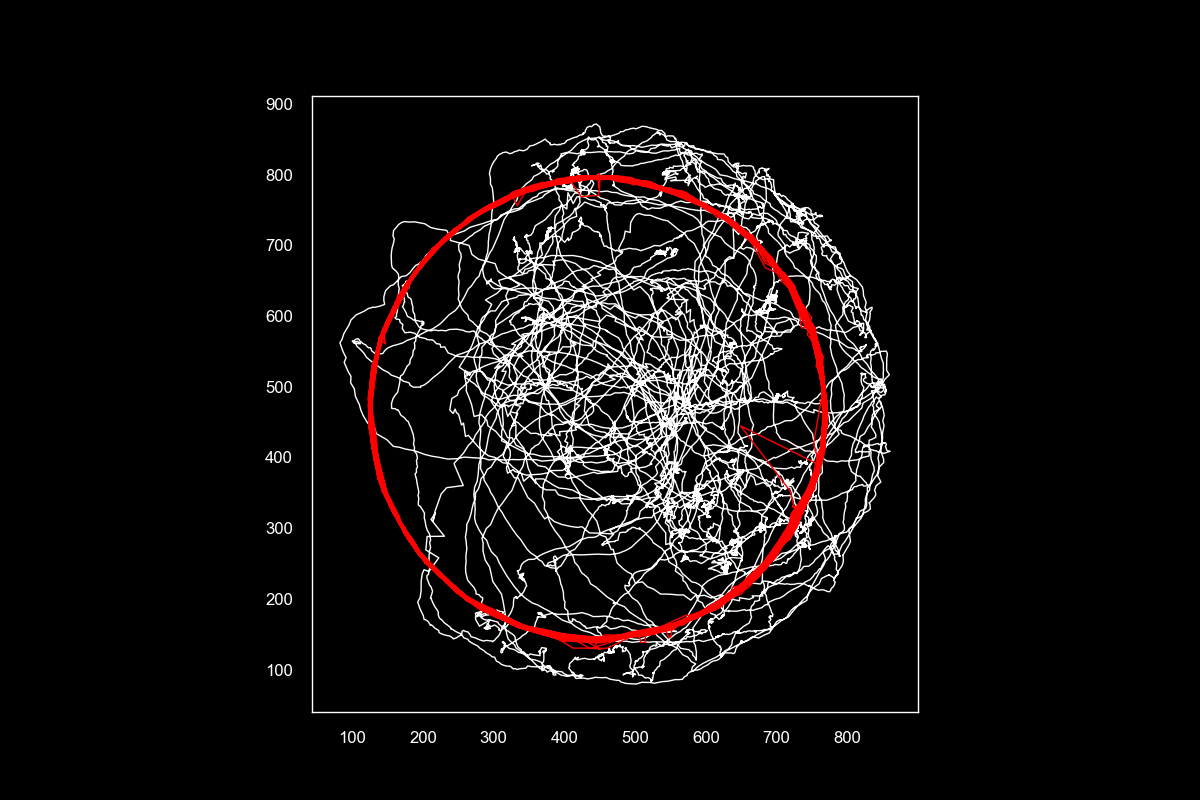

In [1068]:
fig, ax = pl.subplots()
ax.plot(flydf['centroid_x'], flydf['centroid_y'], 'w', lw=0.5)
ax.plot(dotdf['centroid_x'], dotdf['centroid_y'], 'r', lw=0.5)
ax.set_aspect(1)

In [1069]:
# np.dstack([smoothed_x, smoothed_y]).squeeze().shape

(24000, 2)

In [1070]:
# def lpfilter(input_signal, win):
#     # Low-pass linear Filter
#     # (2*win)+1 is the size of the window that determines the values that influence 
#     # the filtered result, centred over the current measurement
#     from scipy import ndimage
#     kernel = np.lib.pad(np.linspace(1,3,win), (0,win-1), 'reflect') 
#     kernel = np.divide(kernel,np.sum(kernel)) # normalise
#     output_signal = ndimage.convolve(input_signal, kernel) 
#     return output_signal

In [1121]:
importlib.reload(dlc)
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/flytracker-analysis/utils.py'>

In [1122]:
# def smooth_speed_steps(dotdf, win=13):
#     smoothed_x = dlc.lpfilter(dotdf['centroid_x'], win)
#     smoothed_y = dlc.lpfilter(dotdf['centroid_y'], win)

#     # smoothed_speed = lpfilter(dotdf['lin_speed'], 13)
#     dot_ctr_sm = np.dstack([smoothed_x, smoothed_y]).squeeze()
#     # dotdf['lin_speed_filt'] = smoothed_speed
#     dotdf['lin_speed_filt'] = np.concatenate(
#                             (np.zeros(1), 
#                             np.sqrt(np.sum(np.square(np.diff(dot_ctr_sm[:cop_ix, ], axis=0)), 
#                             axis=1)))).round(2)
#     return dotdf

<IPython.core.display.Javascript object>


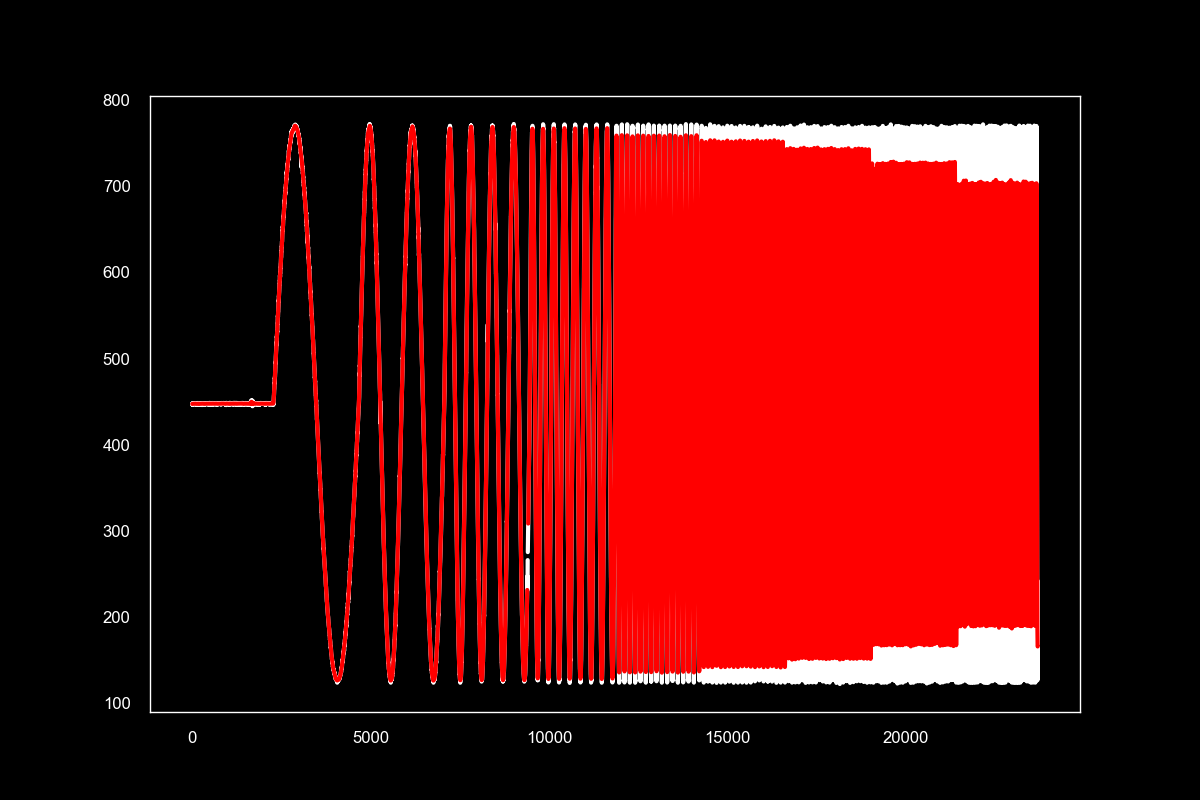

In [1123]:
# smoothed_x = dlc.lpfilter(dotdf['centroid_x'], win)
# smoothed_y = dlc.lpfilter(dotdf['centroid_y'], win)

# # smoothed_speed = lpfilter(dotdf['lin_speed'], 13)
# dot_ctr_sm = np.dstack([smoothed_x, smoothed_y]).squeeze()
# # dotdf['lin_speed_filt'] = smoothed_speed
# dotdf['lin_speed_filt'] = np.concatenate(
#                         (np.zeros(1), 
#                         np.sqrt(np.sum(np.square(np.diff(dot_ctr_sm[:cop_ix, ], axis=0)), 
#                         axis=1)))).round(2)
dotdf = dlc.smooth_speed_steps(dotdf)
fig, ax = pl.subplots()
ax.plot(dotdf['centroid_x'], 'w')
ax.plot(smoothed_x, 'r')

<IPython.core.display.Javascript object>


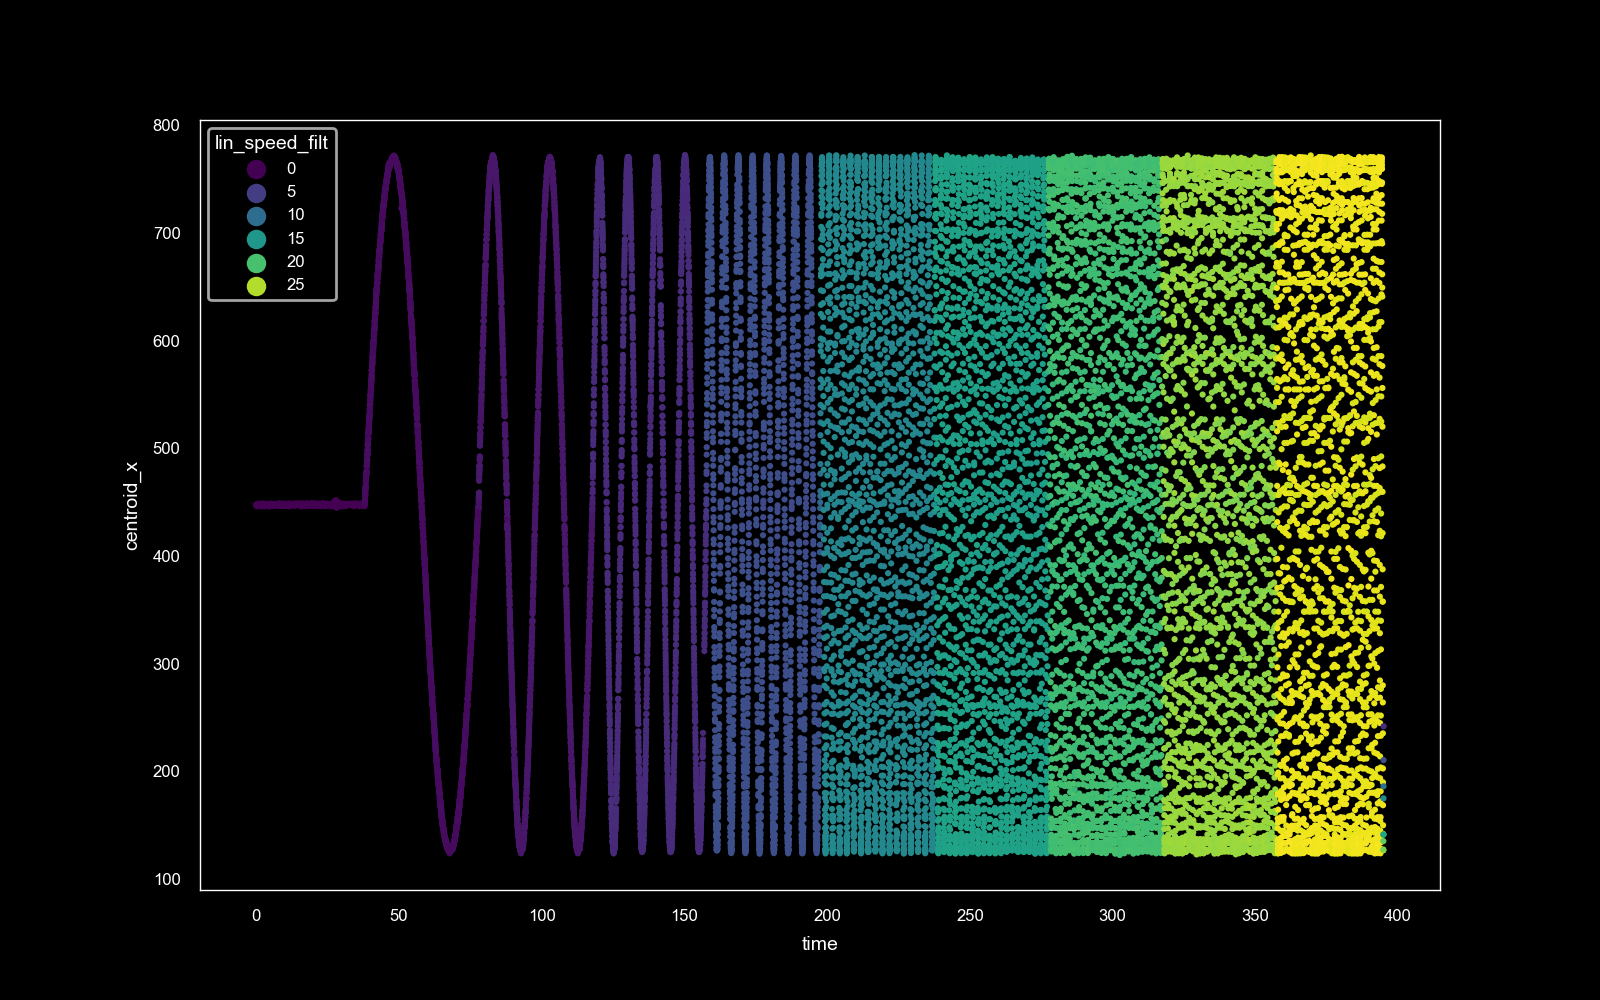

<Axes: xlabel='time', ylabel='centroid_x'>

In [1113]:
fig, ax = pl.subplots(figsize=(8, 5))
sns.scatterplot(x='time', y='centroid_x', data=dotdf, ax=ax,
                hue='lin_speed_filt', palette='viridis', edgecolor='none', s=5)

In [1115]:
dotdf['lin_speed'].max(), dotdf['lin_speed_filt'].max()

(123.04925127187892, 28.26)

<IPython.core.display.Javascript object>


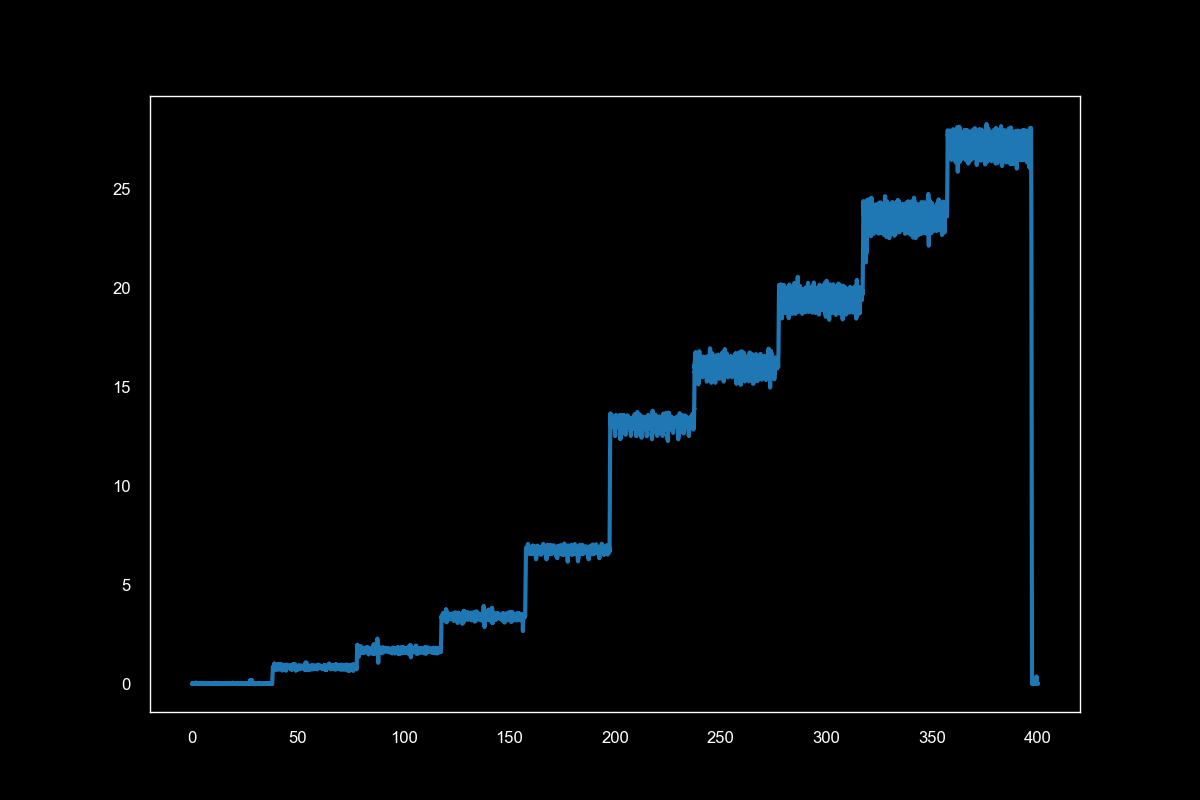

In [1076]:
fig, ax = pl.subplots()
ax.plot(dotdf['time'], dotdf['lin_speed_filt'])
# ax.hist(smoothed[:, 1], 20) #dotdf['lin_speed_filt'], 10)

In [1105]:
importlib.reload(dlc)

<module 'dlc' from '/Users/julianarhee/Repositories/flytracker-analysis/dlc.py'>

In [1106]:
step_dict = dlc.get_step_indices(dotdf, speed_var='lin_speed_filt', 
                             t_start=20, increment=40, n_levels=10)

<IPython.core.display.Javascript object>


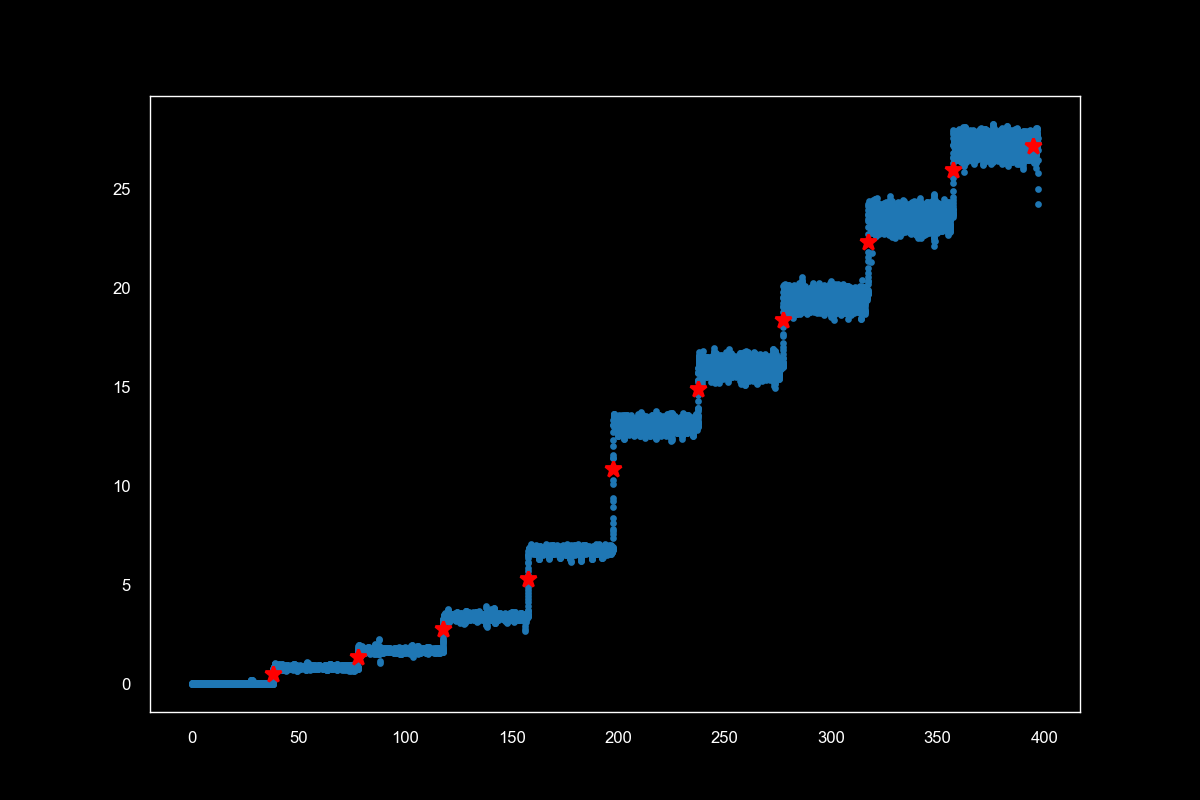

In [1107]:
fig = dlc.check_speed_steps(dotdf, step_dict)

In [1108]:
dotdf = dlc.add_speed_epoch(dotdf, step_dict)
flydf = dlc.add_speed_epoch(flydf, step_dict)

dotdf = dotdf[dotdf['epoch'] < 10]
flydf = flydf[flydf['epoch'] < 10]

In [1109]:
# dotdf['centroid_y_tmp'] = dotdf['centroid_y'] + 100

# fig, ax =pl.subplots()
# sns.scatterplot(data=dotdf, x='time', y='centroid_y_tmp', hue='epoch',
#                 edgecolor='none', s=2, ax=ax, palette='viridis', legend=0)
# sns.scatterplot(x='time', y='centroid_y', data=dotdf, ax=ax,
#                 hue='lin_speed_filt', palette='viridis', edgecolor='none', s=5)
# ax.plot(dotdf['time'], dotdf['lin_speed_filt']*20, 'w')

In [1110]:
# fig, axn = pl.subplots(dotdf['epoch'].nunique(), 1)
# for i, (e, df_) in enumerate(dotdf.groupby('epoch')):
#     print(e, df_[df_['lin_speed']>1.5]['lin_speed'].mean())
#     axn.flat[i].plot(df_['lin_speed'])

# FFT

In [1102]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/flytracker-analysis/utils.py'>

<IPython.core.display.Javascript object>


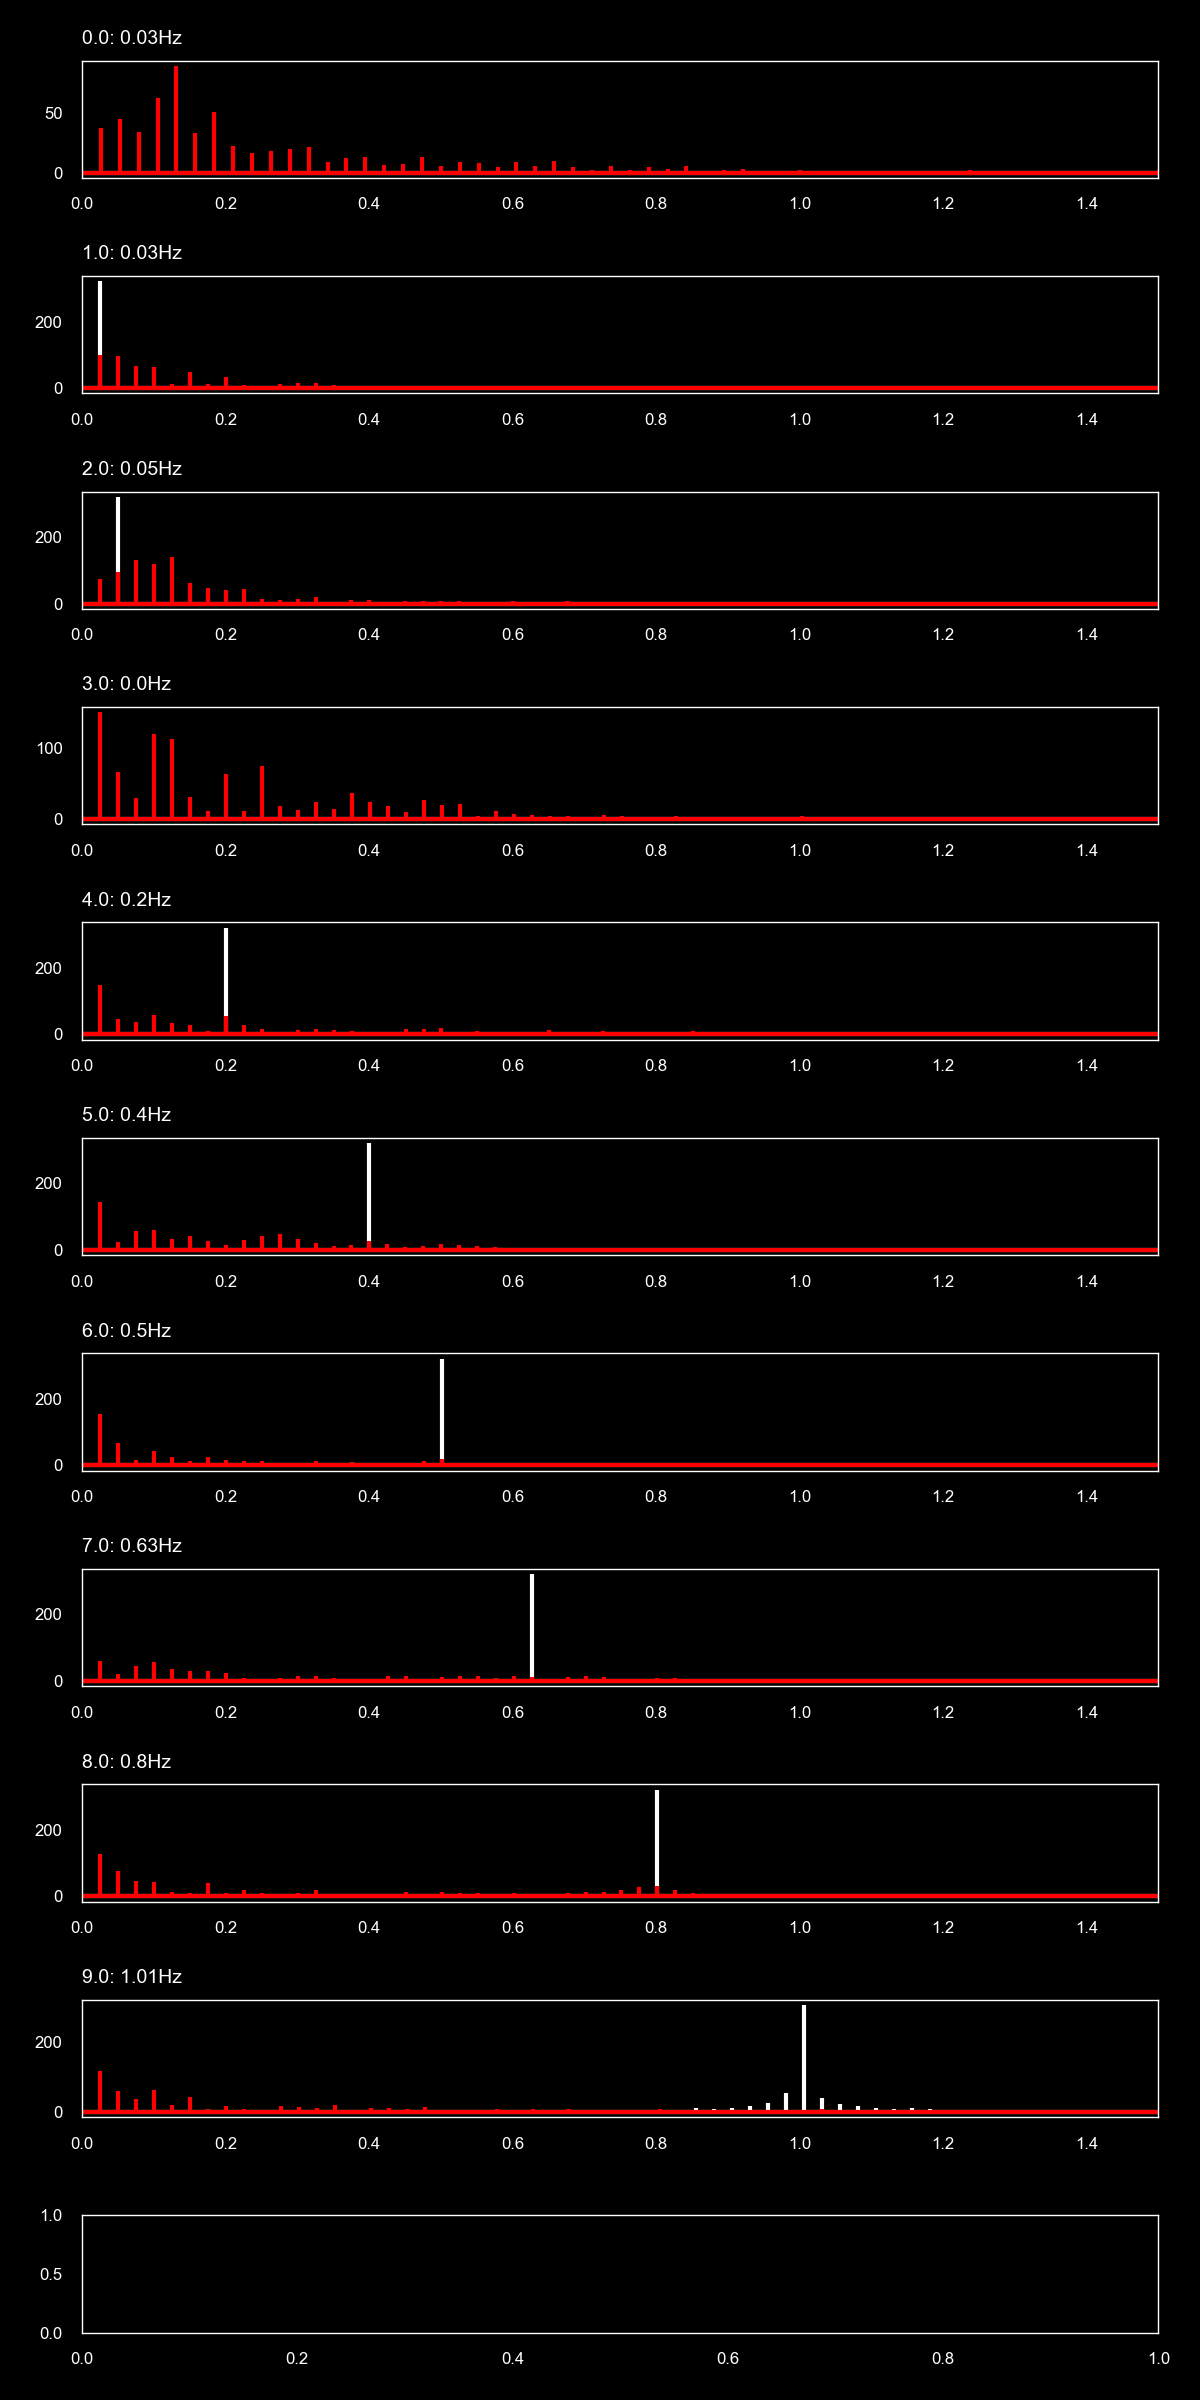

/Users/julianarhee/miniforge3/envs/flytracker/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


0
1
2
3
4
5
6
7
8
9


In [1103]:
fig, axn= pl.subplots(11, 1, figsize=(6, 12))
for ai, (v, df_) in enumerate(dotdf.groupby('epoch')):
    print(ai)
    # dot FFT
    amp, freq = util.get_fft(df_, fft_var='centroid_x', time_var='time')
    # fly
    df2_ = flydf[flydf['epoch']==v].copy()
    amp2, freq2 = util.get_fft(df2_, fft_var='centroid_x',  time_var='time')
    # plot
    ax=axn.flat[ai]
    ax.stem(freq, amp, 'w', markerfmt=" ", basefmt="-w")
    ax.stem(freq2, amp2, 'r', markerfmt=" ", basefmt="-r")
    ax.set_xlim([0, 1.5])
    # get max of DOT
    max_ix = np.argmax(amp)
    ax.set_title('{}: {}Hz'.format(v, freq[max_ix].round(2)), loc='left')
    
#pl.subplots_adjust(hspace=0.7)
pl.tight_layout()

# aggregate - fft

In [1117]:

target_freqs = {0: 0,
                1: 0.03,
                2: 0.05,
                3: 0.1,
                4: 0.2,
                5: 0.4,
                6: 0.5,
                7: 0.63,
                8: 0.8,
                9: 1.0}

In [ ]:
load_trk_df()

In [ ]:

fig, axn= pl.subplots(11, 1, figsize=(6, 12))
for ai, (v, df_) in enumerate(dotdf.groupby('epoch')):
    print(ai)
    # dot FFT
    dot_amp, dot_freq = util.get_fft(df_, fft_var='centroid_x', time_var='time')
    # fly
    flydf_ = flydf[flydf['epoch']==v].copy()
    fly_amp, fly_freq = util.get_fft(flydf_, fft_var='centroid_x',  time_var='time')
    # plot
    
    #target_freq = target_freqs[v]
    target_ix = np.argmin(abs(fly_freq-target_freqs[v]))
    
    amp_at_targ_dot = dot_amp[target_ix]
    amp_at_targ_fly = fly_amp[target_ix]
    